Explore various factors that affect how a movie performs.

# Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tmdb-movie-metadata


In [4]:
df = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
df.shape

(4803, 20)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   keywords              4803 non-null   object 
 3   original_language     4803 non-null   object 
 4   original_title        4803 non-null   object 
 5   popularity            4803 non-null   float64
 6   production_companies  4803 non-null   object 
 7   production_countries  4803 non-null   object 
 8   release_date          4802 non-null   object 
 9   revenue               4803 non-null   int64  
 10  runtime               4801 non-null   float64
 11  spoken_languages      4803 non-null   object 
 12  status                4803 non-null   object 
 13  title                 4803 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

In [23]:
df['vote_count'].unique()

array([11800,  4500,  4466, ...,   587,  1708,  2078])

In [24]:
df = df.drop(['id'], axis = 1)

Dropped homepage, id, overview and tagline since I deem them unnecessary for our purpose.

# Graphs

In [26]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'title', 'vote_average', 'vote_count'],
      dtype='object')

In [29]:
import ast
from collections import Counter

genre_lists = df['genres'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)])

all_genres = [genre for sublist in genre_lists for genre in sublist]
genre_counts = Counter(all_genres)

# Genre

<ipython-input-30-1902148171>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='Genre', y='Count', palette='viridis')


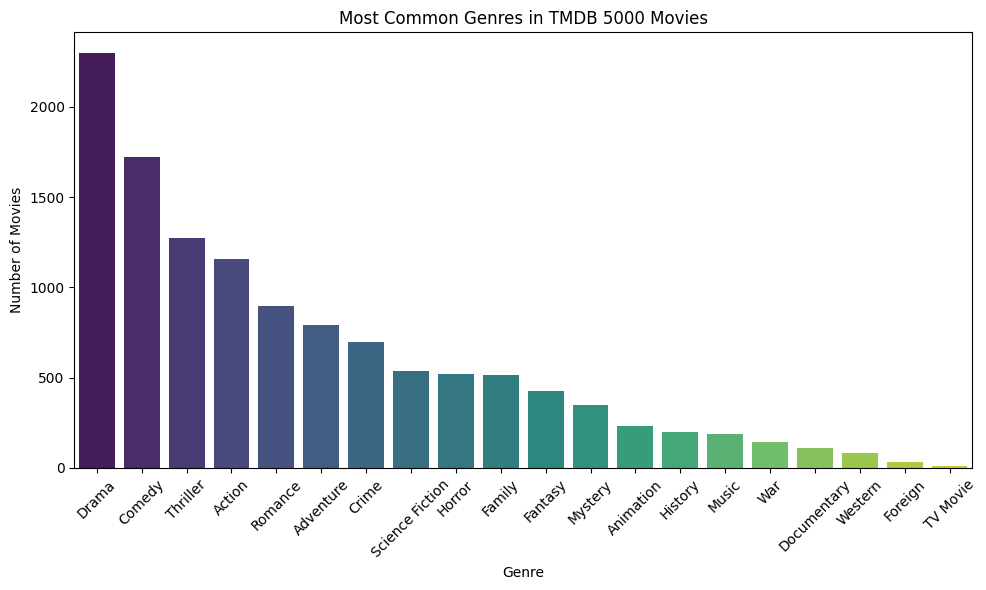

In [30]:
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=genre_df, x='Genre', y='Count', palette='viridis')
plt.title('Most Common Genres in TMDB 5000 Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

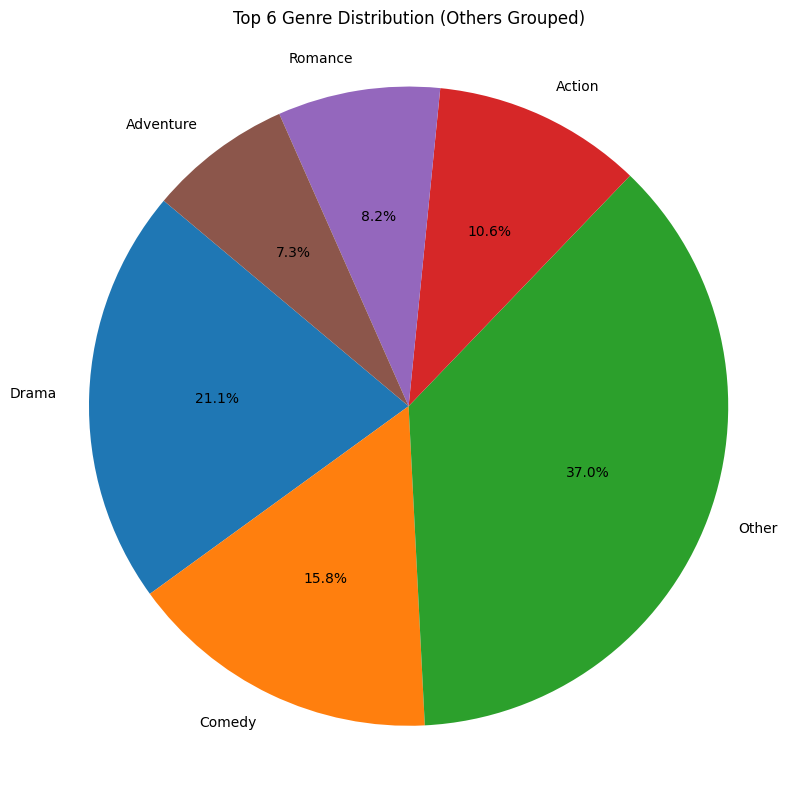

In [34]:
import matplotlib.pyplot as plt

top_genres = genre_df.head(6).copy()
other_count = genre_df['Count'][6:].sum()
top_genres.loc[len(top_genres.index)] = ['Other', other_count]

colors = plt.get_cmap('tab10').colors

plt.figure(figsize=(8,8))
plt.pie(
    top_genres['Count'],
    labels=top_genres['Genre'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors[:len(top_genres)]
)
plt.title('Top 6 Genre Distribution (Others Grouped)')
plt.axis('equal')
plt.tight_layout()
plt.show()


Drama and Comedy occupy 37% of the films.

# Budget vs Revenue

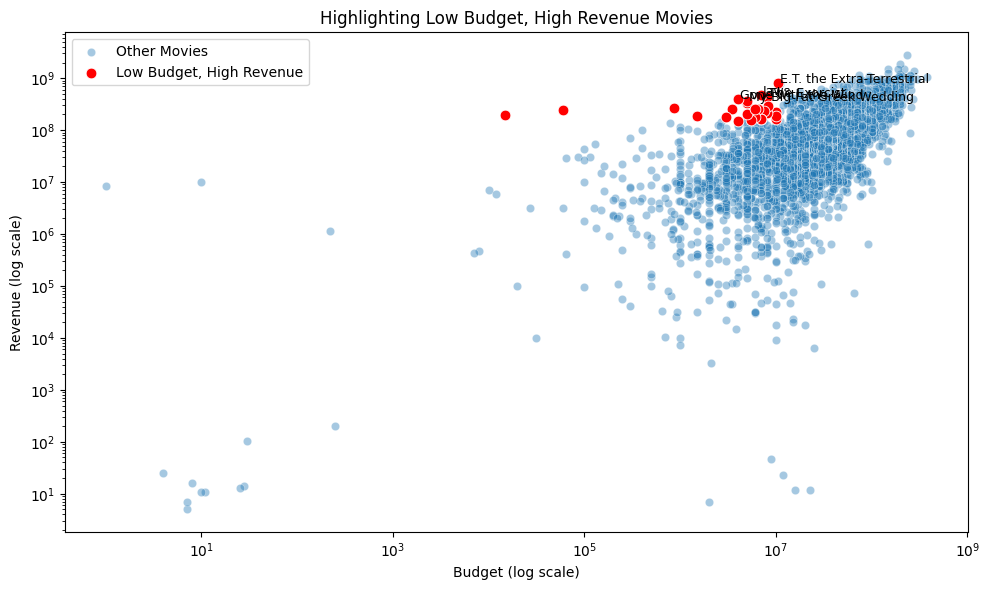

In [36]:
df_valid = df[(df['budget'] > 0) & (df['revenue'] > 0)]

low_budget_thresh = df_valid['budget'].quantile(0.25)
high_revenue_thresh = df_valid['revenue'].quantile(0.75)

regular = df_valid[~((df_valid['budget'] <= low_budget_thresh) & (df_valid['revenue'] >= high_revenue_thresh))]
highlight = df_valid[(df_valid['budget'] <= low_budget_thresh) & (df_valid['revenue'] >= high_revenue_thresh)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=regular, x='budget', y='revenue', alpha=0.4, label='Other Movies')
sns.scatterplot(data=highlight, x='budget', y='revenue', color='red', s=60, label='Low Budget, High Revenue')

plt.xscale('log')
plt.yscale('log')

for _, row in highlight.nlargest(5, 'revenue').iterrows():
    plt.text(row['budget']*1.05, row['revenue'], row['title'], fontsize=9)

plt.xlabel('Budget (log scale)')
plt.ylabel('Revenue (log scale)')
plt.title('Highlighting Low Budget, High Revenue Movies')
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
df_valid = df[(df['budget'] > 0) & (df['revenue'] > 0)]

low_budget_threshold = df_valid['budget'].quantile(0.25)
high_revenue_threshold = df_valid['revenue'].quantile(0.75)

low_budget_high_revenue = df_valid[
    (df_valid['budget'] <= low_budget_threshold) &
    (df_valid['revenue'] >= high_revenue_threshold)
]

low_budget_high_revenue[['title', 'budget', 'revenue']].sort_values(by='revenue', ascending=False)

,title,budget,revenue
2967,E.T. the Extra-Terrestrial,10500000,792910554
2809,Jaws,7000000,470654000
2808,The Exorcist,8000000,441306145
3813,Gone with the Wind,4000000,400176459
3593,My Big Fat Greek Wedding,5000000,368744044
3202,Crocodile Dundee,5000000,328203506
3236,The Sound of Music,8200000,286214286
4441,Bambi,858000,267447150
3824,The Full Monty,3500000,257850122
3418,Annabelle,6500000,255273813


Despite small budgets, films like Paranormal Activity and The Blair Witch Project achieved massive box office returns, proving that creativity and audience appeal can outperform production scale.

# Release Trend

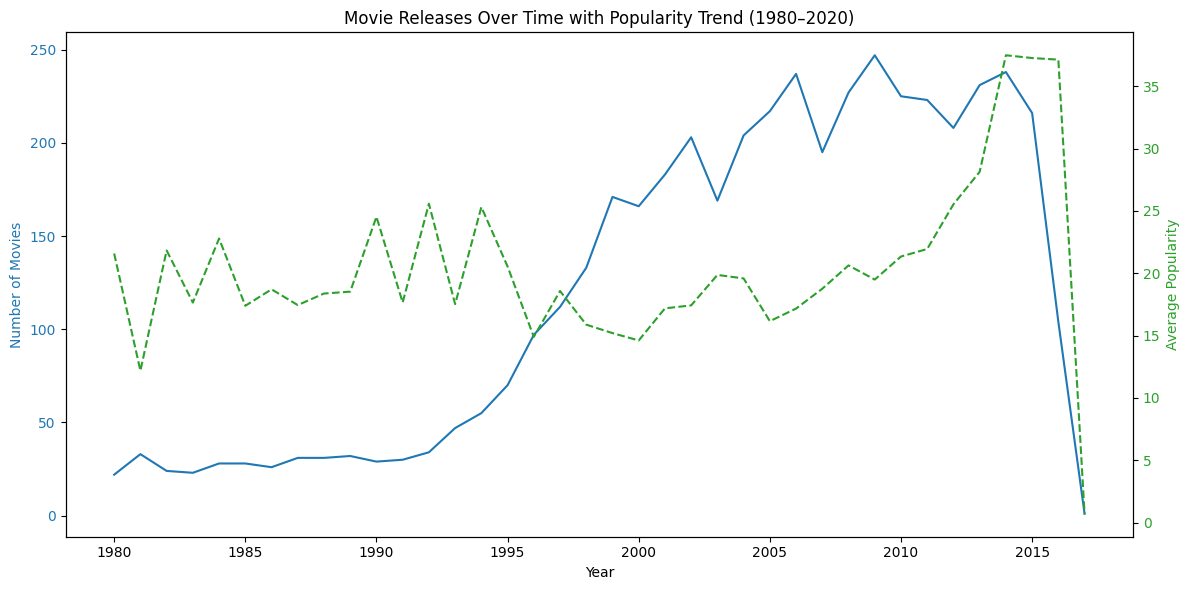

In [37]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df['release_year'] = df['release_date'].dt.year

df_years = df[(df['release_year'] >= 1980) & (df['release_year'] <= 2020)]

release_trend = df_years.groupby('release_year').agg({
    'title': 'count',
    'popularity': 'mean',
    'revenue': 'mean'
}).rename(columns={'title': 'movie_count'})

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(release_trend.index, release_trend['movie_count'], color='tab:blue', label='Movie Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Movies', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(release_trend.index, release_trend['popularity'], color='tab:green', linestyle='--', label='Avg Popularity')
ax2.set_ylabel('Average Popularity', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Movie Releases Over Time with Popularity Trend (1980–2020)')
fig.tight_layout()
plt.show()

The early 2000s saw a significant rise in the number of movies released each year, likely driven by the lower cost and accessibility of digital filmmaking tools. Interestingly, while quantity increased, average popularity fluctuated, suggesting market saturation or shifts in audience preferences.

# Genre and Revenue

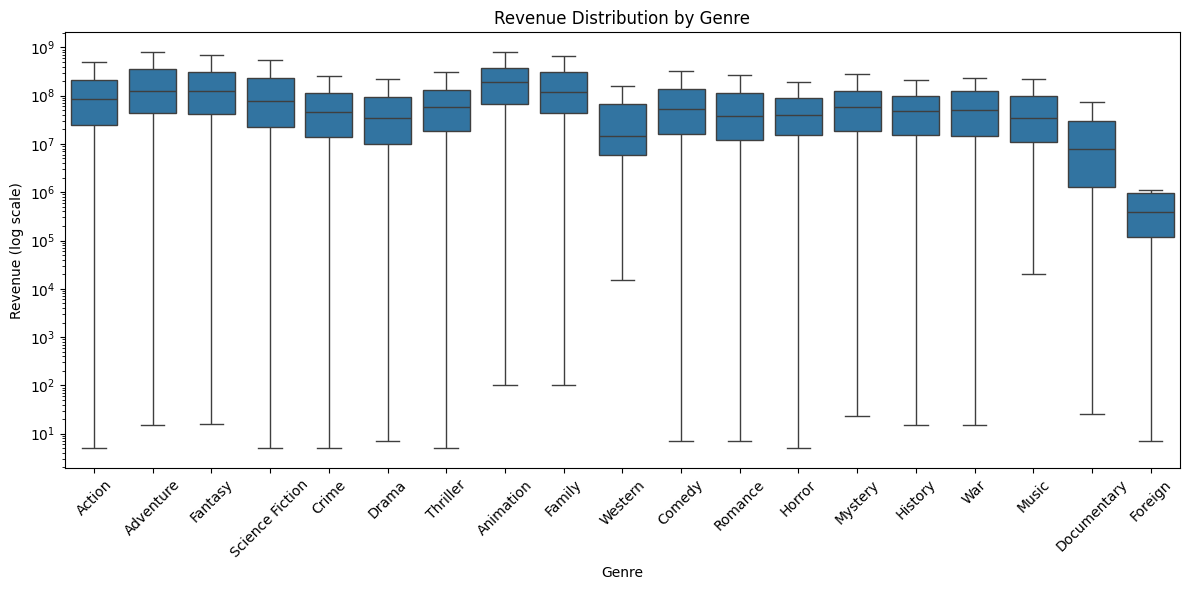

In [39]:
df_revenue = df[df['revenue'] > 0].copy()

df_revenue['genres'] = df_revenue['genres'].apply(ast.literal_eval)
df_revenue['genres'] = df_revenue['genres'].apply(lambda x: [d['name'] for d in x])

df_exploded = df_revenue.explode('genres').reset_index(drop=True)
df_exploded = df_exploded.rename(columns={'genres': 'genre'})

plt.figure(figsize=(12,6))
sns.boxplot(data=df_exploded, x='genre', y='revenue', showfliers=False)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Revenue Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue (log scale)')
plt.tight_layout()
plt.show()

Animation has high revenue, and Documentry has lowest alongside Foreign.

# Language

<ipython-input-40-2644298544>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values, y=language_counts.index, palette='coolwarm')
<ipython-input-40-2644298544>:17: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-40-2644298544>:17: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-40-2644298544>:17: UserWarning: Glyph 35805 (\N{CJK UNIFIED IDEOGRAPH-8BDD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-40-2644298544>:17: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-40-2644298544>:17: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(

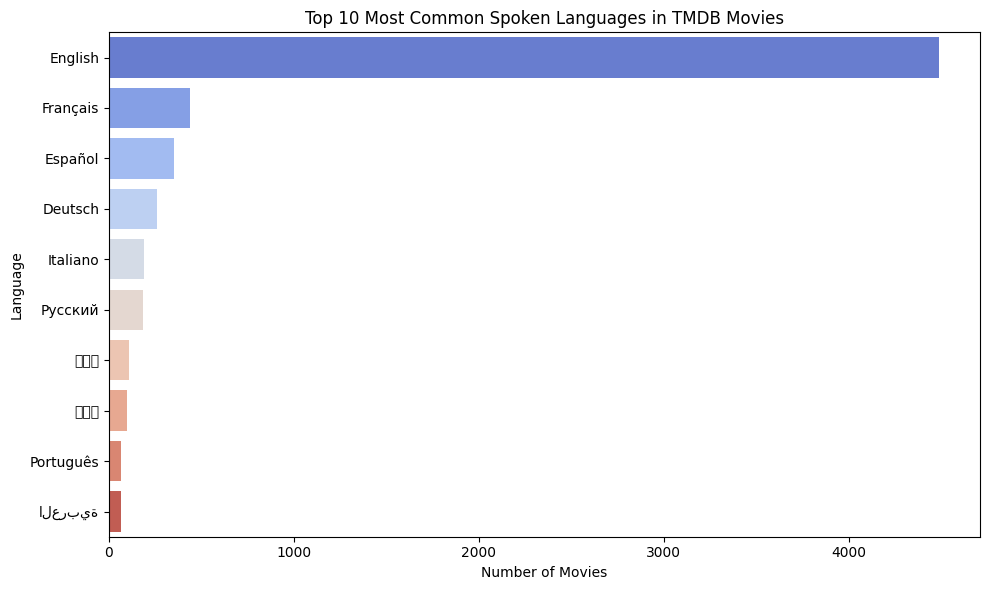

In [40]:
df['spoken_languages'] = df['spoken_languages'].apply(ast.literal_eval)

language_lists = df['spoken_languages'].apply(lambda x: [d['name'] for d in x])
all_languages = [lang for sublist in language_lists for lang in sublist]

language_counts = pd.Series(Counter(all_languages)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='coolwarm')
plt.title('Top 10 Most Common Spoken Languages in TMDB Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.tight_layout()
plt.show()